In [ ]:
Name : Omkar .U. Hulawale
Roll_no : 14153
Batch : A3

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [23]:
df = pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [24]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [25]:
df = df.drop(['Unnamed: 0', 'key'], axis=1)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [28]:
df.shape

(200000, 7)

In [31]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [33]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [35]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [39]:
df['dropoff_latitude'] = df['dropoff_latitude'].fillna(df['dropoff_latitude'].mean())

In [41]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     0
passenger_count      0
dtype: int64

In [43]:
df['dropoff_longitude'] = df['dropoff_longitude'].fillna(df['dropoff_longitude'].median())

In [45]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [47]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [49]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce')

In [51]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [53]:
df = df.assign(hour=df.pickup_datetime.dt.hour,
               day=df.pickup_datetime.dt.day,
               month=df.pickup_datetime.dt.month,
               year=df.pickup_datetime.dt.year,
               dayofweek=df.pickup_datetime.dt.dayofweek)

In [57]:
df.head

<bound method NDFrame.head of         fare_amount           pickup_datetime  pickup_longitude  \
0               7.5 2015-05-07 19:52:06+00:00        -73.999817   
1               7.7 2009-07-17 20:04:56+00:00        -73.994355   
2              12.9 2009-08-24 21:45:00+00:00        -74.005043   
3               5.3 2009-06-26 08:22:21+00:00        -73.976124   
4              16.0 2014-08-28 17:47:00+00:00        -73.925023   
...             ...                       ...               ...   
199995          3.0 2012-10-28 10:49:00+00:00        -73.987042   
199996          7.5 2014-03-14 01:09:00+00:00        -73.984722   
199997         30.9 2009-06-29 00:42:00+00:00        -73.986017   
199998         14.5 2015-05-20 14:56:25+00:00        -73.997124   
199999         14.1 2010-05-15 04:08:00+00:00        -73.984395   

        pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0             40.738354         -73.999512         40.723217                1   
1  

In [59]:
df = df.drop('pickup_datetime', axis=1)

In [61]:
df.head

<bound method NDFrame.head of         fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0               7.5        -73.999817        40.738354         -73.999512   
1               7.7        -73.994355        40.728225         -73.994710   
2              12.9        -74.005043        40.740770         -73.962565   
3               5.3        -73.976124        40.790844         -73.965316   
4              16.0        -73.925023        40.744085         -73.973082   
...             ...               ...              ...                ...   
199995          3.0        -73.987042        40.739367         -73.986525   
199996          7.5        -73.984722        40.736837         -74.006672   
199997         30.9        -73.986017        40.756487         -73.858957   
199998         14.5        -73.997124        40.725452         -73.983215   
199999         14.1        -73.984395        40.720077         -73.985508   

        dropoff_latitude  passenger_count  ho

In [63]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
hour                   int32
day                    int32
month                  int32
year                   int32
dayofweek              int32
dtype: object

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

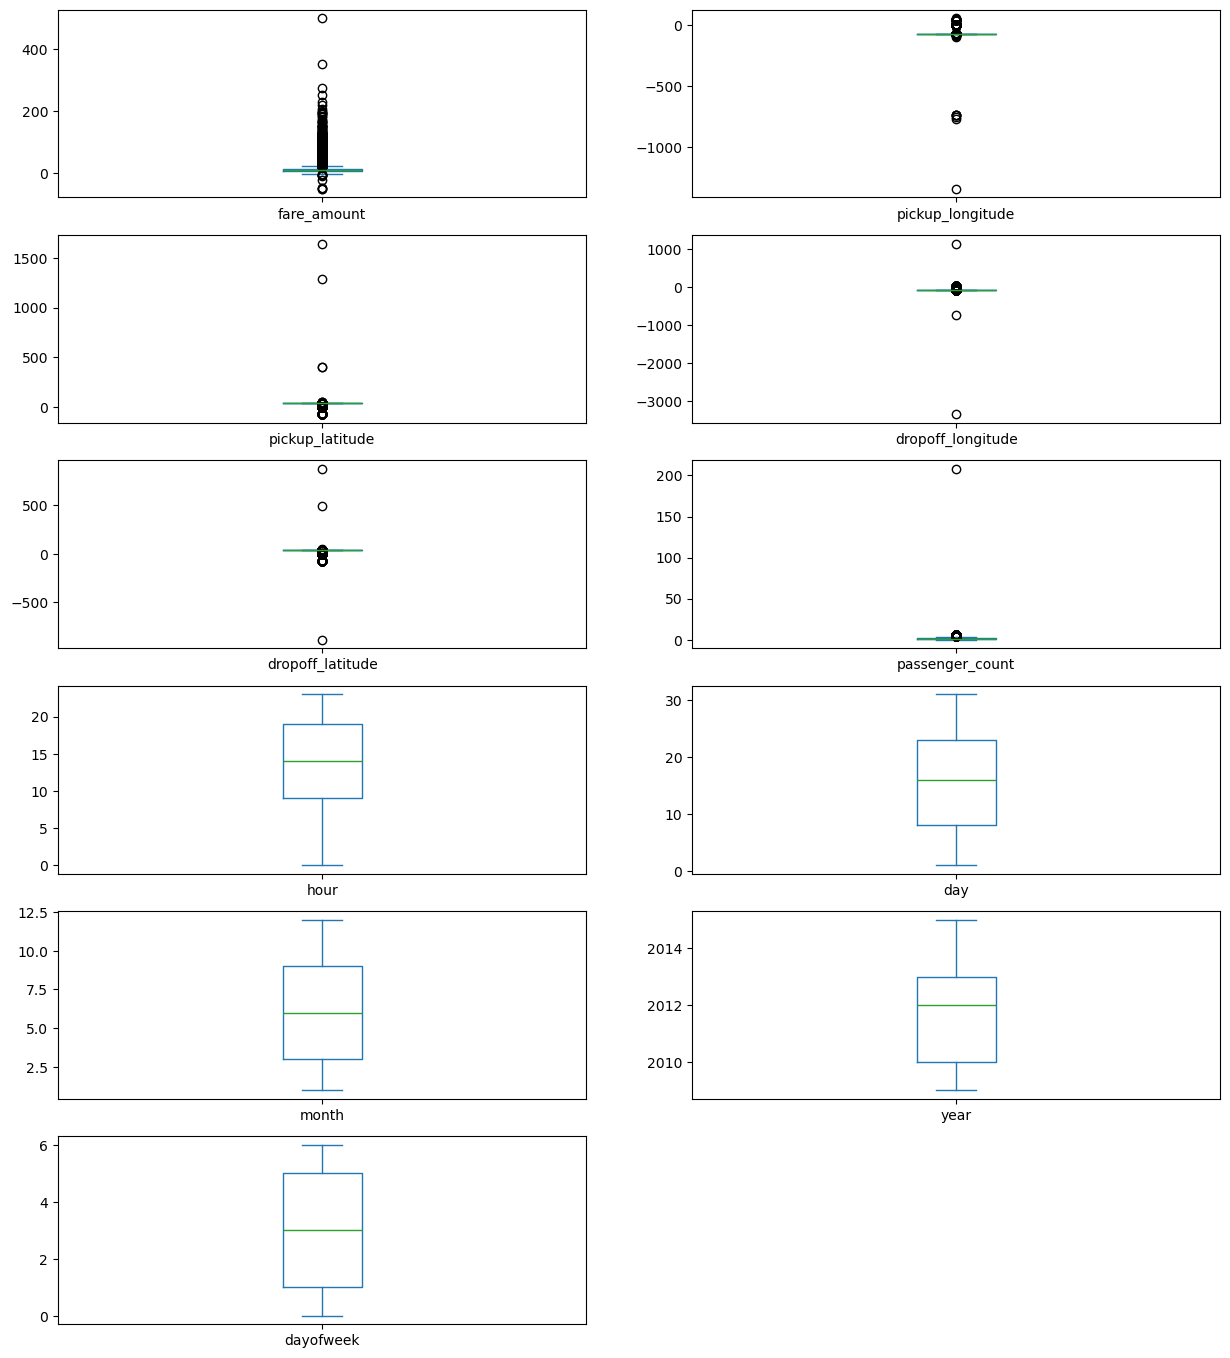

In [65]:
df.plot(kind="box", subplots=True, layout=(7,2), figsize=(15,20))

In [67]:
def remove_outlier(df1, col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    df1[col] = np.clip(df1[col], lower_whisker, upper_whisker)
    return df1

def treat_outliers_all(df1, col_list):
    for c in col_list:
        df1 = remove_outlier(df1, c)
    return df1

In [69]:
df = treat_outliers_all(df, df.iloc[:,0::])

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

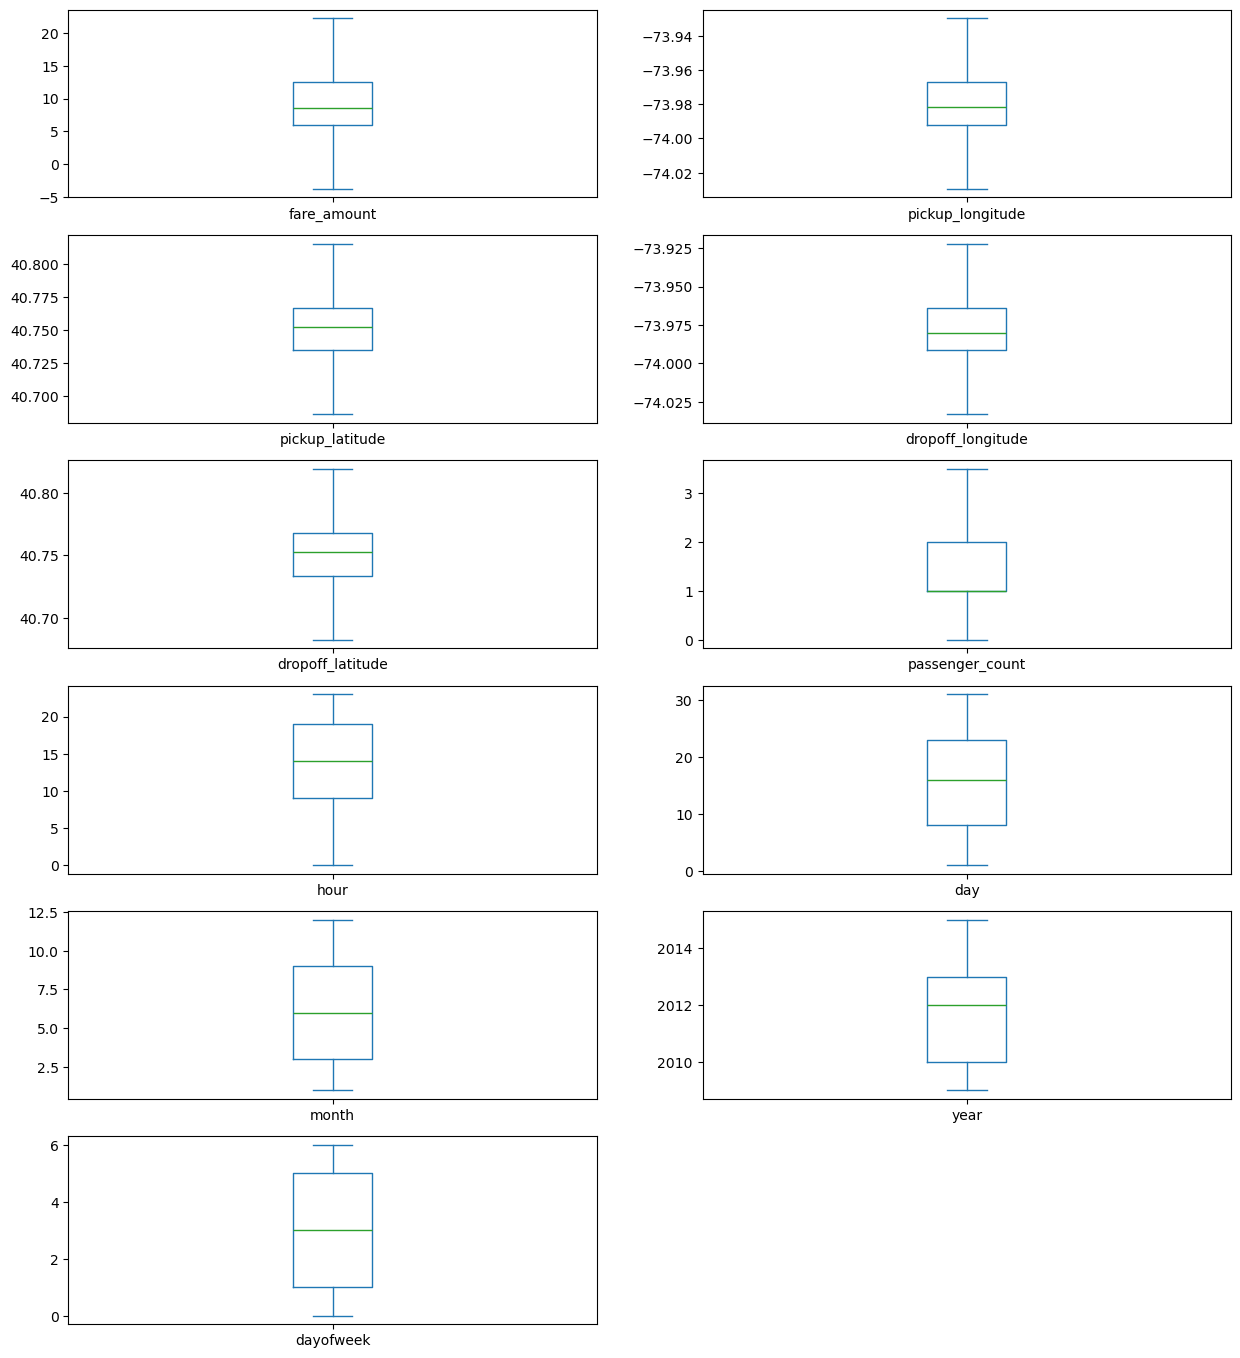

In [71]:
df.plot(kind="box", subplots=True, layout=(7,2), figsize=(15,20))

In [73]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


In [75]:
import haversine as hs
travel_dist = []
for pos in range(len(df)):
    loc1 = (df['pickup_latitude'].iloc[pos], df['pickup_longitude'].iloc[pos])
    loc2 = (df['dropoff_latitude'].iloc[pos], df['dropoff_longitude'].iloc[pos])
    c = hs.haversine(loc1, loc2)
    travel_dist.append(c)

print(travel_dist)
df['dist_travel_km'] = travel_dist
df.head

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



<bound method NDFrame.head of         fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0              7.50        -73.999817        40.738354         -73.999512   
1              7.70        -73.994355        40.728225         -73.994710   
2             12.90        -74.005043        40.740770         -73.962565   
3              5.30        -73.976124        40.790844         -73.965316   
4             16.00        -73.929786        40.744085         -73.973082   
...             ...               ...              ...                ...   
199995         3.00        -73.987042        40.739367         -73.986525   
199996         7.50        -73.984722        40.736837         -74.006672   
199997        22.25        -73.986017        40.756487         -73.922036   
199998        14.50        -73.997124        40.725452         -73.983215   
199999        14.10        -73.984395        40.720077         -73.985508   

        dropoff_latitude  passenger_count  ho

In [77]:
df = df.loc[(df.dist_travel_km >= 1) & (df.dist_travel_km <= 130)]
print("Remaining observations:", df.shape)

Remaining observations: (163040, 12)


In [95]:
incorrect_coordinates = df.loc[
    (df.pickup_latitude > 90) | (df.pickup_latitude < -90) |
    (df.dropoff_latitude > 90) | (df.dropoff_latitude < -90) |
    (df.pickup_longitude > 180) | (df.pickup_longitude < -180) |
    (df.dropoff_longitude > 180) | (df.dropoff_longitude < -180)
]

In [97]:
df.drop(incorrect_coordinates.index, inplace=True,errors='ignore')

In [99]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.116088


In [101]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
year                 0
dayofweek            0
dist_travel_km       0
dtype: int64

<Axes: >

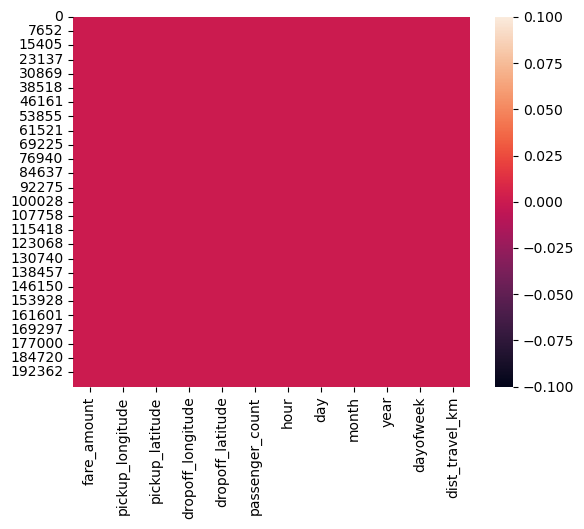

In [103]:
sns.heatmap(df.isnull())

In [105]:
corr=df.corr()

In [107]:
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.193177,-0.119469,0.258583,-0.137745,0.015056,-0.029760,0.001607,0.031339,0.161861,0.009264,0.798926
pickup_longitude,0.193177,1.000000,0.425309,0.241569,0.169203,-0.012892,0.013057,-0.004459,0.000863,0.014862,-0.028392,0.130003
pickup_latitude,-0.119469,0.425309,1.000000,0.148761,0.358836,-0.016186,0.031484,0.002907,0.001627,-0.016172,-0.044618,-0.143530
dropoff_longitude,0.258583,0.241569,0.148761,1.000000,0.401751,-0.008642,-0.059704,-0.005886,0.002400,0.015646,-0.002147,0.247210
dropoff_latitude,-0.137745,0.169203,0.358836,0.401751,1.000000,-0.007419,0.019775,-0.000130,-0.001663,-0.010472,-0.031153,-0.111577
passenger_count,0.015056,-0.012892,-0.016186,-0.008642,-0.007419,1.000000,0.020203,0.002730,0.009936,-0.007765,0.047728,0.007754
hour,-0.029760,0.013057,0.031484,-0.059704,0.019775,0.020203,1.000000,0.005447,-0.002887,0.002574,-0.090975,-0.047251
day,0.001607,-0.004459,0.002907,-0.005886,-0.000130,0.002730,0.005447,1.000000,-0.017113,-0.011725,0.005673,0.001019
month,0.031339,0.000863,0.001627,0.002400,-0.001663,0.009936,-0.002887,-0.017113,1.000000,-0.113429,-0.010483,0.008433
year,0.161861,0.014862,-0.016172,0.015646,-0.010472,-0.007765,0.002574,-0.011725,-0.113429,1.000000,0.006522,0.020138


<Axes: >

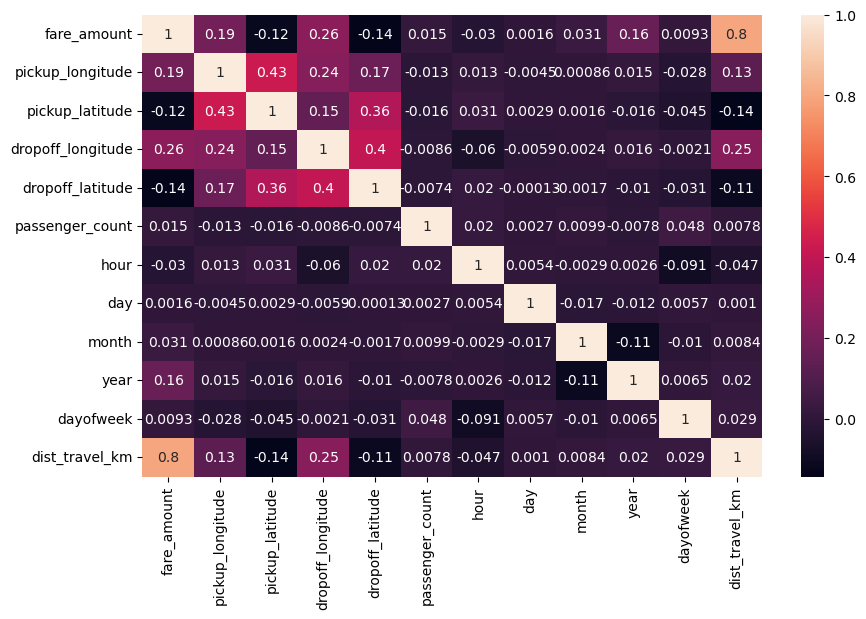

In [109]:
fig, axis = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

In [111]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
hour                   int32
day                    int32
month                  int32
year                   int32
dayofweek              int32
dist_travel_km       float64
dtype: object

In [113]:
x = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
        'passenger_count', 'hour', 'day', 'month', 'year', 'dayofweek', 'dist_travel_km']]

In [115]:
y = df['fare_amount']

In [117]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [119]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [121]:
regression.fit(x_train, y_train)

LinearRegression()

In [123]:
print("Intercept:", regression.intercept_)

Intercept: 2700.266812013834


In [125]:
print("Coefficients:", regression.coef_)

Coefficients: [ 2.89362010e+01 -1.32635888e+01  1.17673265e+01  6.24365652e-02
  6.29596205e-03  1.67231847e-03  6.44958264e-02  4.25437048e-01
 -3.70023665e-02  1.84160078e+00]


In [127]:
prediction = regression.predict(x_test)

In [129]:
print(prediction)

[ 7.63673984 10.58858115 11.57545494 ...  9.09671379  9.44210183
  8.68998951]


In [131]:
y_test

84906      8.1
197858    11.0
159216    10.9
125619    15.7
19806     11.0
          ... 
144675    10.5
155703     8.5
14678     10.0
19750      8.0
106861     8.9
Name: fare_amount, Length: 53804, dtype: float64

In [133]:
from sklearn.metrics import r2_score, mean_squared_error

In [135]:
print("R² Score:", r2_score(y_test, prediction))
print("MSE:", mean_squared_error(y_test, prediction))

R² Score: 0.6711116194688453
MSE: 9.429862101866641
